In [1]:
# Basics and Plotting
import pandas as pd
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from itertools import chain, combinations
import csv

# Sklearn Models
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

# Alternative models
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/jprichmond20/2020ElectionStudy/main/anes_timeseries_2020_csv_20220210.csv")

C:\Users\JP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,1508,1509) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
for skip_blank_lines in [True, False]:
    print("Skip Blank Lines:", skip_blank_lines)
    df = pd.read_csv("https://raw.githubusercontent.com/jprichmond20/2020ElectionStudy/main/anes_timeseries_2020_csv_20220210.csv", skip_blank_lines=skip_blank_lines)

    print("Row count:", len(df))
    

Skip Blank Lines: True
Row count: 8280
Skip Blank Lines: False
Row count: 8280


In [4]:
print("Unique values:", df[df.columns[0]].unique(), "\n")

Unique values: ['ANES2020TimeSeries_20220210'] 



In [5]:
df

,version,V200001,V160001_orig,V200002,V200003,V200004,V200005,V200006,V200007,V200008,...,V203518,V203519,V203520,V203521,V203522,V203523,V203524,V203525,V203526,V203527
0,ANES2020TimeSeries_20220210,200015,401318,3,2,3,0,-2,-2,-2,...,Thomas Jeffery 'Tom' Cole,1,-1. Inapplicable,-1,-1,82,-1. Inapplicable,-1,-1. Inapplicable,-1
1,ANES2020TimeSeries_20220210,200022,300261,3,2,3,0,4,-1,3,...,Michael Keith 'Mike' Simpson,1,-1. Inapplicable,-1,-1,-1,-1. Inapplicable,-1,-1. Inapplicable,-1
2,ANES2020TimeSeries_20220210,200039,400181,3,2,3,0,-2,-2,-2,...,Scott William Taylor,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
3,ANES2020TimeSeries_20220210,200046,300171,3,2,3,0,-2,-2,-2,...,Devin Gerald Nunes,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
4,ANES2020TimeSeries_20220210,200053,405145,3,2,3,1,-2,-2,-2,...,Kenneth R. 'Ken' Buck,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,ANES2020TimeSeries_20220210,535315,-1,1,6,3,0,-2,-2,-2,...,Neal Patrick Dunn,1,-1. Inapplicable,-1,-1,82,-1. Inapplicable,-1,-1. Inapplicable,-1
8276,ANES2020TimeSeries_20220210,535360,-1,1,6,3,0,1,1,1,...,Michael Keith 'Mike' Simpson,1,-1. Inapplicable,-1,-1,-1,-1. Inapplicable,-1,-1. Inapplicable,-1
8277,ANES2020TimeSeries_20220210,535414,-1,2,6,3,0,-2,-2,-2,...,Kenneth S. 'Ken' Calvert,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
8278,ANES2020TimeSeries_20220210,535421,-1,3,6,3,0,-2,-2,-2,...,Robert J. 'Rob' Wittman,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1


In [6]:
df.head()

,version,V200001,V160001_orig,V200002,V200003,V200004,V200005,V200006,V200007,V200008,...,V203518,V203519,V203520,V203521,V203522,V203523,V203524,V203525,V203526,V203527
0,ANES2020TimeSeries_20220210,200015,401318,3,2,3,0,-2,-2,-2,...,Thomas Jeffery 'Tom' Cole,1,-1. Inapplicable,-1,-1,82,-1. Inapplicable,-1,-1. Inapplicable,-1
1,ANES2020TimeSeries_20220210,200022,300261,3,2,3,0,4,-1,3,...,Michael Keith 'Mike' Simpson,1,-1. Inapplicable,-1,-1,-1,-1. Inapplicable,-1,-1. Inapplicable,-1
2,ANES2020TimeSeries_20220210,200039,400181,3,2,3,0,-2,-2,-2,...,Scott William Taylor,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
3,ANES2020TimeSeries_20220210,200046,300171,3,2,3,0,-2,-2,-2,...,Devin Gerald Nunes,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
4,ANES2020TimeSeries_20220210,200053,405145,3,2,3,1,-2,-2,-2,...,Kenneth R. 'Ken' Buck,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1


In [7]:
df = df[["V201004", "V201005", "V201008", 
                    "V201024", "V201029", "V201030", "V201651", 
                    "V201645", "V201628", "V201627", "V201626", 
                    "V201622", "V201620", "V201607", "V201606", 
                    "V201602", "V201600", "V201601", "V201594", 
                    "V201589", "V201575", "V201565x", "V201550", 
                    "V201549x", "V201540", "V201531", 
                    "V201530y", "V201515", "V201511x", "V201508", 
                    "V201507x", "V201462", "V201453", "V201435", 
                    "V201433", "V201432x", "V201426x", "V201417", 
                    "V201416", "V201411x", "V201393", "V201379", 
                    "V201377", "V201366", "V201364", "V201359x", 
                    "V201335", "V201244", "V201242", "V201241", 
                    "V201240", "V201239", "V201237", "V201231x", 
                    "V201232", "V201220", "V201216", "V201156", 
                    "V201157", "V201122", "V201123", "V201121", 
                    "V201114", "V201100", "V201103", "V201036", 
                   "V201018"]]

In [8]:
df.head()

,V201004,V201005,V201008,V201024,V201029,V201030,V201651,V201645,V201628,V201627,...,V201156,V201157,V201122,V201123,V201121,V201114,V201100,V201103,V201036,V201018
0,-1,2,1,-1,-1,-1,1,3,3,1,...,0,85,5,1,1,1,1,2,-1,2
1,-1,4,1,-1,-1,-1,3,4,0,2,...,0,50,3,3,1,2,2,5,-1,4
2,-1,1,1,-1,-1,-1,3,1,0,3,...,60,0,5,5,1,2,1,1,-1,-1
3,-1,2,1,-1,-1,-1,1,1,0,4,...,50,70,4,4,2,2,2,1,-1,2
4,-1,2,1,-1,-1,-1,2,1,0,4,...,20,70,3,3,4,2,1,2,-1,4


In [9]:
df

,V201004,V201005,V201008,V201024,V201029,V201030,V201651,V201645,V201628,V201627,...,V201156,V201157,V201122,V201123,V201121,V201114,V201100,V201103,V201036,V201018
0,-1,2,1,-1,-1,-1,1,3,3,1,...,0,85,5,1,1,1,1,2,-1,2
1,-1,4,1,-1,-1,-1,3,4,0,2,...,0,50,3,3,1,2,2,5,-1,4
2,-1,1,1,-1,-1,-1,3,1,0,3,...,60,0,5,5,1,2,1,1,-1,-1
3,-1,2,1,-1,-1,-1,1,1,0,4,...,50,70,4,4,2,2,2,1,-1,2
4,-1,2,1,-1,-1,-1,2,1,0,4,...,20,70,3,3,4,2,1,2,-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,2,1,1,-1,-1,-1,2,2,0,4,...,0,100,3,3,3,2,1,-1,-1,2
8276,2,4,1,-1,-1,-1,1,4,0,2,...,40,70,4,4,2,2,1,5,-1,2
8277,-1,2,1,-1,-1,-1,2,4,0,4,...,85,50,3,5,3,2,2,-1,-1,1
8278,-1,2,1,1,2,1,1,4,1,3,...,0,70,5,4,2,2,-1,2,-1,-1


In [ ]:
df.rename(columns = {V2012004:})

KeyError: -9

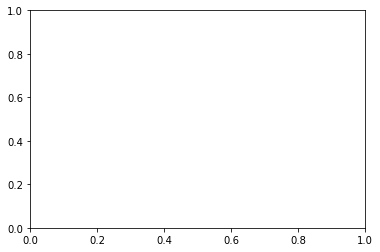

In [10]:
fig, ax = plt.subplots()
colors = {'-9':'blue', '-8':'red', '-1':'green', '1':'blue', '2':'red', '4':'red', '5':'blue'}
grouped = df.groupby('V201018')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='V201156', 
               y='V201157', label=key, color=colors[key])
plt.show()

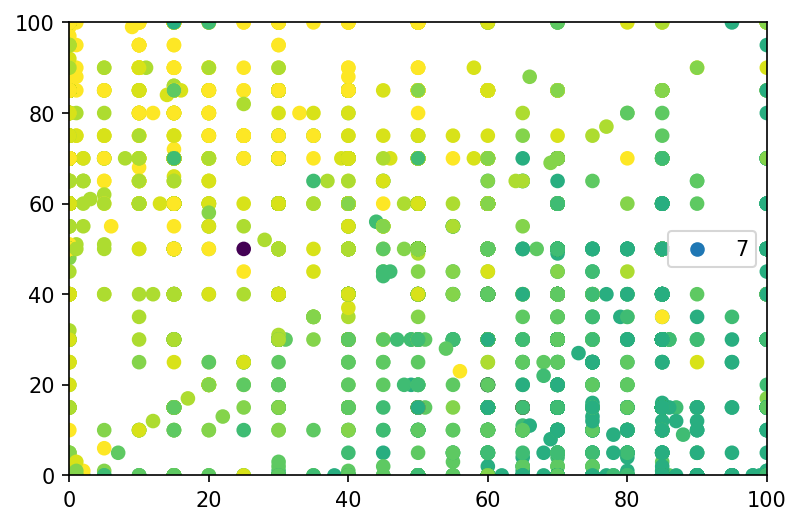

In [11]:
plt.figure(dpi=150)
parties = ['D', 'R']
colors = {'-9':'blue', '-8':'red', '-1':'green', '1':'blue', '2':'red', '4':'red', '5':'blue'}
plt.scatter(df['V201156'], df['V201157'], c=df['V201231x'])

plt.xlim(0,100)
plt.ylim(0,100)
plt.legend(df['V201231x'].values)
plt.show()

In [12]:
mod = smf.ols(formula='V201029 ~ 1 + V201004 + V201005 + V201008 + V201024 + V201029 + V201030 + V201651 + V201645+ V201628+ V201627+ V201626+ V201622+ V201620+ V201607+ V201606+ V201602+ V201600+ V201601+ V201594+ V201589+ V201575+ V201565x+ V201550+ V201549x+ V201540+ V201531+ V201530y+ V201515+ V201511x+ V201508+ V201507x+ V201462+ V201453+ V201435+ V201433+ V201432x+ V201426x+ V201417+ V201416+ V201411x+ V201393+ V201379+ V201377+ V201366+ V201364+ V201359x+ V201335+ V201244+ V201242+ V201241+ V201240+ V201239+ V201237+ V201231x+ V201232+ V201220+ V201216+ V201156+ V201157+ V201122+ V201123+ V201121+ V201114+ V201100+ V201103+ V201036+ V201018', data=df)

In [13]:
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                V201029   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.049e+29
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:11:53   Log-Likelihood:             2.5142e+05
No. Observations:                8280   AIC:                        -5.027e+05
Df Residuals:                    8216   BIC:                        -5.023e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.709e-16   4.64e-17     14.469      0.000     5.8e-16    7.62e-16
V201004    -9.298e-16   3.28e-16     -2.836      0.005   -1.57e-15   -2.87e-16
V201005    -3.102e-15   1.96e-16    -15.847      0.000   -3.49e-15   -2.72e-15
V201008    -4.191e-15    2.9e-16    -14.455      0.000   -4.76e-15   -3.62e-15
V201024    -1.898e-14   6.81e-16    -27.898      0.000   -2.03e-14   -1.77e-14
V201029        1.0000   5.13e-16   1.95e+15      0.000       1.000       1.000
V201030     8.424e-15    1.2e-15      6.995      0.000    6.06e-15    1.08e-14
V201651    -2.933e-15    1.4e-16    -20.918      0.000   -3.21e-15   -2.66e-15
V201645     4.276e-16   9.74e-17      4.392      0.000    2.37e-16    6.18e-16
V201628    -7.806e-17   3.04e-17     -2.568      0.010   -1.38e-16   -1.85e-17
V201627     2.075e-15   1.38e-16     15.080      0.000    1.81e-15    2.34e-15
V201626    -9.103e-16   1.24e-16     -7.320      0.000   -1.15e-15   -6.67e-16
V201622     7.073e-16   1.44e-16      4.920      0.000    4.26e-16    9.89e-16
V201620     3.149e-16   2.44e-16      1.292      0.196   -1.63e-16    7.93e-16
V201607    -1.781e-15   1.39e-16    -12.805      0.000   -2.05e-15   -1.51e-15
V201606     8.327e-17   6.36e-17      1.310      0.190   -4.14e-17    2.08e-16
V201602    -6.774e-16   1.73e-16     -3.918      0.000   -1.02e-15   -3.38e-16
V201600      3.86e-16   2.04e-16      1.894      0.058   -1.35e-17    7.85e-16
V201601     5.057e-16   1.56e-16      3.241      0.001       2e-16    8.12e-16
V201594    -1.726e-16    1.4e-16     -1.236      0.217   -4.46e-16    1.01e-16
V201589      2.88e-16      2e-16      1.442      0.149   -1.03e-16    6.79e-16
V201575     2.007e-16   1.08e-17     18.565      0.000    1.79e-16    2.22e-16
V201565x    3.053e-16   1.36e-16      2.244      0.025    3.87e-17    5.72e-16
V201550    -2.605e-15   1.39e-16    -18.725      0.000   -2.88e-15   -2.33e-15
V201549x   -1.665e-16   1.22e-16     -1.368      0.171   -4.05e-16    7.22e-17
V201540    -8.544e-16   1.12e-16     -7.645      0.000   -1.07e-15   -6.35e-16
V201531    -2.224e-15   1.39e-16    -15.988      0.000    -2.5e-15   -1.95e-15
V201530y    -2.58e-15   1.39e-16    -18.544      0.000   -2.85e-15   -2.31e-15
V201515     3.973e-16   2.51e-16      1.582      0.114   -9.48e-17    8.89e-16
V201511x   -2.151e-16   1.33e-16     -1.616      0.106   -4.76e-16    4.58e-17
V201508    -8.361e-16   9.18e-17     -9.110      0.000   -1.02e-15   -6.56e-16
V201507x   -2.311e-16   9.77e-18    -23.640      0.000    -2.5e-16   -2.12e-16
V201462    -4.966e-16      5e-17     -9.929      0.000   -5.95e-16   -3.99e-16
V201453     6.418e-17   9.41e-17      0.682      0.495    -1.2e-16    2.49e-16
V201435     5.421e-17   4.12e-17      1.317      0.188   -2.65e-17    1.35e-16
V201433     5.725e-17   1.39e-16      0.412      0.680   -2.15e-16     3.3e-16
V2

In [14]:
vif = pd.DataFrame()
vif['X'] = df.columns
vif['vif'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif

C:\Users\JP\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,X,vif
0,V201004,1.040483
1,V201005,1.379976
2,V201008,1.364705
3,V201024,6.256338
4,V201029,3.395553
...,...,...
62,V201114,1.252199
63,V201100,2.605628
64,V201103,1.304789
65,V201036,1.228866


In [15]:
df.columns.get_loc('V201029')

4

In [16]:
metric_store = [[],[]]
for i, combination in enumerate(combinations([0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66],1), 1):
    x_data = sm.add_constant(df.iloc[:,list(combination)])
    mod  = sm.OLS(df.V201029, x_data).fit()
    metric_store[0].append(list(combination))
    metric_store[1].append(mod.bic)

In [17]:
metric_store

[[[0],
  [1],
  [2],
  [3],
  [5],
  [6],
  [7],
  [8],
  [9],
  [10],
  [11],
  [12],
  [13],
  [14],
  [15],
  [16],
  [17],
  [18],
  [19],
  [20],
  [21],
  [22],
  [23],
  [24],
  [25],
  [26],
  [27],
  [28],
  [29],
  [30],
  [31],
  [32],
  [33],
  [34],
  [35],
  [36],
  [37],
  [38],
  [39],
  [40],
  [41],
  [42],
  [43],
  [44],
  [45],
  [46],
  [47],
  [48],
  [49],
  [50],
  [51],
  [52],
  [53],
  [54],
  [55],
  [56],
  [57],
  [58],
  [59],
  [60],
  [61],
  [62],
  [63],
  [64],
  [65],
  [66]],
 [15679.345835410919,
  15681.066865718321,
  15676.768871081054,
  10276.084606110908,
  6348.492462937689,
  15686.924574002389,
  15688.444599905652,
  15683.545837572992,
  15687.599365902373,
  15688.166135975725,
  15687.937376730699,
  15687.752599109694,
  15679.753185431857,
  15686.406864191946,
  15688.135619088456,
  15682.095086978801,
  15663.957520431886,
  15681.890427005548,
  15688.549322195577,
  15688.720704422545,
  15681.998120757544,
  15679.75318543185

In [18]:
metric_store[0][np.argmin(metric_store[1])], np.min(metric_store[1])

([5], 6348.492462937689)

In [19]:
metric_store = [[],[]]
for i, combination in enumerate(combinations([0,1,2,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66],1), 1):
    x_data = sm.add_constant(df.iloc[:,[5] + list(combination)])
    mod  = sm.OLS(df.V201029, x_data).fit()
    metric_store[0].append(list(combination))
    metric_store[1].append(mod.bic)

In [20]:
metric_store[0][np.argmin(metric_store[1])], np.min(metric_store[1])

([3], 5892.831703582399)

In [21]:
metric_store = [[],[]]
for i, combination in enumerate(combinations([0,1,2,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66],1), 1):
    x_data = sm.add_constant(df.iloc[:,[5,3] + list(combination)])
    mod  = sm.OLS(df.V201029, x_data).fit()
    metric_store[0].append(list(combination))
    metric_store[1].append(mod.bic)

In [22]:
metric_store[0][np.argmin(metric_store[1])], np.min(metric_store[1])

([50], 5842.547066585336)

In [23]:
metric_store = [[],[]]
for i, combination in enumerate(combinations([0,1,2,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66],1), 1):
    x_data = sm.add_constant(df.iloc[:,[5,3,50] + list(combination)])
    mod  = sm.OLS(df.V201029, x_data).fit()
    metric_store[0].append(list(combination))
    metric_store[1].append(mod.bic)

In [24]:
metric_store[0][np.argmin(metric_store[1])], np.min(metric_store[1])

([17], 5810.066390138751)

In [25]:
metric_store = [[],[]]
for i, combination in enumerate(combinations([0,1,2,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66],1), 1):
    x_data = sm.add_constant(df.iloc[:,[5,3,50,17] + list(combination)])
    mod  = sm.OLS(df.V201029, x_data).fit()
    metric_store[0].append(list(combination))
    metric_store[1].append(mod.bic)

In [26]:
metric_store[0][np.argmin(metric_store[1])], np.min(metric_store[1])

([6], 5792.414577964922)

In [27]:
metric_store = [[],[]]
for i, combination in enumerate(combinations([0,1,2,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66],1), 1):
    x_data = sm.add_constant(df.iloc[:,[5,3,50,17,6] + list(combination)])
    mod  = sm.OLS(df.V201029, x_data).fit()
    metric_store[0].append(list(combination))
    metric_store[1].append(mod.bic)

In [28]:
metric_store[0][np.argmin(metric_store[1])], np.min(metric_store[1])

([64], 5783.846900402808)

In [29]:
metric_store = [[],[]]
for i, combination in enumerate(combinations([0,1,2,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,65,66],1), 1):
    x_data = sm.add_constant(df.iloc[:,[5,3,50,17,6,64] + list(combination)])
    mod  = sm.OLS(df.V201029, x_data).fit()
    metric_store[0].append(list(combination))
    metric_store[1].append(mod.bic)

In [30]:
metric_store[0][np.argmin(metric_store[1])], np.min(metric_store[1])

([31], 5776.680274849675)

In [31]:
metric_store = [[],[]]
for i, combination in enumerate(combinations([0,1,2,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,65,66],1), 1):
    x_data = sm.add_constant(df.iloc[:,[5,3,50,17,6,64,31] + list(combination)])
    mod  = sm.OLS(df.V201029, x_data).fit()
    metric_store[0].append(list(combination))
    metric_store[1].append(mod.bic)

In [32]:
metric_store[0][np.argmin(metric_store[1])], np.min(metric_store[1])

([10], 5770.420415505274)

In [33]:
metric_store = [[],[]]
for i, combination in enumerate(combinations([0,1,2,7,8,9,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,65,66],1), 1):
    x_data = sm.add_constant(df.iloc[:,[5,3,50,17,6,64,31,10] + list(combination)])
    mod  = sm.OLS(df.V201029, x_data).fit()
    metric_store[0].append(list(combination))
    metric_store[1].append(mod.bic)

In [34]:
metric_store[0][np.argmin(metric_store[1])], np.min(metric_store[1])

([63], 5769.938738045016)

In [35]:
metric_store = [[],[]]
for i, combination in enumerate(combinations([0,1,2,7,8,9,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,65,66],1), 1):
    x_data = sm.add_constant(df.iloc[:,[5,3,50,17,6,64,31,10,63] + list(combination)])
    mod  = sm.OLS(df.V201029, x_data).fit()
    metric_store[0].append(list(combination))
    metric_store[1].append(mod.bic)

In [36]:
metric_store[0][np.argmin(metric_store[1])], np.min(metric_store[1])

([56], 5767.146220392722)

In [39]:
metric_store = [[],[]]
for i, combination in enumerate(combinations([0,1,2,7,8,9,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,51,52,53,54,55,57,58,59,60,61,62,65,66],1), 1):
    x_data = sm.add_constant(df.iloc[:,[5,3,50,17,6,64,31,10,63,56] + list(combination)])
    mod  = sm.OLS(df.V201029, x_data).fit()
    metric_store[0].append(list(combination))
    metric_store[1].append(mod.bic)

In [40]:
metric_store[0][np.argmin(metric_store[1])], np.min(metric_store[1])

([13], 5767.146220392722)

In [48]:
dfNew = df.iloc[:,[4,5,3,50,17,6,64,31,10,63,56]]

In [49]:
dfNew.head()

,V201029,V201030,V201024,V201240,V201601,V201651,V201103,V201462,V201626,V201100,V201216
0,-1,-1,-1,5,1,1,2,12,4,1,1
1,-1,-1,-1,3,1,3,5,13,3,2,1
2,-1,-1,-1,1,1,3,1,8,2,1,1
3,-1,-1,-1,3,1,1,1,5,2,2,2
4,-1,-1,-1,4,1,2,2,12,2,1,1


In [51]:
dfNew

,V201029,V201030,V201024,V201240,V201601,V201651,V201103,V201462,V201626,V201100,V201216
0,-1,-1,-1,5,1,1,2,12,4,1,1
1,-1,-1,-1,3,1,3,5,13,3,2,1
2,-1,-1,-1,1,1,3,1,8,2,1,1
3,-1,-1,-1,3,1,1,1,5,2,2,2
4,-1,-1,-1,4,1,2,2,12,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8275,-1,-1,-1,5,1,2,-1,13,4,1,1
8276,-1,-1,-1,4,1,1,5,13,3,1,3
8277,-1,-1,-1,2,1,2,-1,13,4,2,1
8278,2,1,1,5,1,1,2,5,4,-1,1


In [52]:
mod = smf.ols(formula='V201029 ~ 1 +  + V201030 + V201024 + V201240 + V201601 + V201651 + V201103 + V201462 + V201626 + V201100 + V201216', data = dfNew)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                V201029   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     1941.
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:35:18   Log-Likelihood:                -2834.0
No. Observations:                8280   AIC:                             5690.
Df Residuals:                    8269   BIC:                             5767.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0760      0.015      4.946      0.000       0.046       0.106
V201030        1.5052      0.020     75.937      0.000       1.466       1.544
V201024       -0.2935      0.014    -20.566      0.000      -0.322      -0.266
V201240        0.0204      0.003      8.127      0.000       0.015       0.025
V201601        0.0141      0.003      5.022      0.000       0.009       0.020
V201651        0.0148      0.003      5.600      0.000       0.010       0.020
V201103        0.0133      0.002      5.337      0.000       0.008       0.018
V201462        0.0037      0.001      4.083      0.000       0.002       0.006
V201626       -0.0083      0.002     -3.744      0.000      -0.013      -0.004
V201100        0.0188      0.004      4.409      0.000       0.010       0.027
V201216       -0.0148      0.004     -3.436      0.001      -0.023      -0.006
==============================================================================
Omnibus:                     8723.975   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         53161336.959
Skew:                          -3.855   Prob(JB):                         0.00
Kurtosis:                     395.468   Cond. No.                         70.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
loocv = LeaveOneOut()
regr = skl_lm.LinearRegression()
M = 16
pred = [1,2,3,4,5,6,7,8,9,10]
loocv_mse = []

for i in range(M):
    predMSE = []
    for j in pred:
        x_poly = PolynomialFeatures(i).fit_transform(dfNew.iloc[:,j].to_numpy().reshape(-1,1))
        mse = cross_val_score(regr, x_poly, dfNew.V201029, cv=loocv, scoring='neg_mean_squared_error').mean()
        predMSE.append(-mse)
    val = 0
    for j in predMSE:
        val += j
    loocv_mse.append(val)

In [56]:
loocv_mse

[3.886659391013439,
 3.3941787314730116,
 3.4867702029078096,
 3.876471016457547,
 234.54823762249802,
 48.04822139745128,
 6131.737927723039,
 570487.9306351395,
 271270823.3984385,
 710685615.952697,
 1558539403.821846,
 551976475065.0883,
 6381537669341.484,
 1874097994996397.5,
 1.9568736868892304e+16,
 1.7104520791491688e+19]